In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
#import yfinance as yf
import pandas_datareader.data as web
#yf.pdr_override
import warnings

def analyse(X, cutoff = 0.05):
    # Ho root unitary test (non stationary)
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print(f'p-value = {pvalue} Serie = {X.name} is stationary')
        return True
    else:
        print(f'p-value = {pvalue} Serie = {X.name} isnt stationary')
        return False

plt.style.available

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.rcParams['figure.figsize'] = (50,15)
plt.style.use('dark_background')

In [ ]:
eurusd = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURUSD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurusd','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
euraud = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURAUD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'euraud','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
eurcad = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURCAD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurcad','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])


In [ ]:
eurchf = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURCHF_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurchf','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
eurgbp = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURGBP_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurgbp','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
eurjpy = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURJPY_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurjpy','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
eurnzd = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURNZD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'eurnzd','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low',
                                                                                                                                                                               '<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>','Date'])

In [ ]:
allclose=pd.DataFrame([eurusd['eurusd'],euraud['euraud'],eurcad['eurcad'],eurchf['eurchf'],eurgbp['eurgbp'],eurjpy['eurjpy'],eurnzd['eurnzd']]).T.dropna()
allclose

,eurusd,euraud,eurcad,eurchf,eurgbp,eurjpy,eurnzd
0,1.43153,1.59509,1.49880,1.48334,0.88680,132.757,1.97720
1,1.42886,1.59346,1.49949,1.48250,0.88618,132.730,1.97922
2,1.42705,1.59382,1.49738,1.48294,0.88675,132.680,1.98094
3,1.42939,1.59439,1.49367,1.48239,0.88706,132.743,1.98214
4,1.42848,1.59304,1.49487,1.48181,0.88758,132.490,1.98134
...,...,...,...,...,...,...,...
67690,1.20706,1.62684,1.55911,1.08332,0.89796,125.904,1.70743
67691,1.20665,1.62931,1.55899,1.08290,0.89906,125.929,1.70504
67692,1.20683,1.62934,1.55848,1.08271,0.89928,125.893,1.70596
67693,1.20733,1.62814,1.56171,1.08270,0.89900,125.902,1.70982


In [ ]:
allclose.diff()*100

,eurusd,euraud,eurcad,eurchf,eurgbp,eurjpy,eurnzd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.267,-0.163,0.069,-0.084,-0.062,-2.7,0.202
2,-0.181,0.036,-0.211,0.044,0.057,-5.0,0.172
3,0.234,0.057,-0.371,-0.055,0.031,6.3,0.120
4,-0.091,-0.135,0.120,-0.058,0.052,-25.3,-0.080
...,...,...,...,...,...,...,...
67690,-0.008,0.155,-0.080,-0.098,0.118,-0.6,0.158
67691,-0.041,0.247,-0.012,-0.042,0.110,2.5,-0.239
67692,0.018,0.003,-0.051,-0.019,0.022,-3.6,0.092
67693,0.050,-0.120,0.323,-0.001,-0.028,0.9,0.386


In [ ]:
-3.298815*10**-6

-3.2988e-06

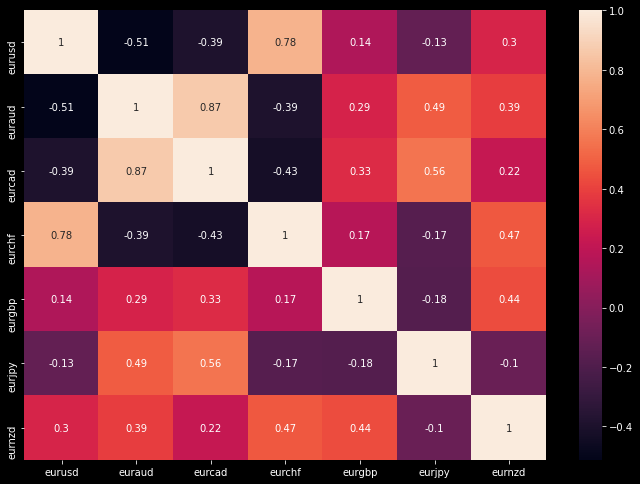

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=allclose.corr(),annot=True,ax=ax)

In [ ]:
allclose.corr()

,eurusd,euraud,eurcad,eurchf,eurgbp,eurjpy,eurnzd
eurusd,1.000000,-0.512327,-0.389770,0.781392,0.138457,-0.125100,0.296417
euraud,-0.512327,1.000000,0.867182,-0.388720,0.290850,0.485384,0.389467
eurcad,-0.389770,0.867182,1.000000,-0.428454,0.325614,0.557280,0.221987
eurchf,0.781392,-0.388720,-0.428454,1.000000,0.167138,-0.171379,0.472776
eurgbp,0.138457,0.290850,0.325614,0.167138,1.000000,-0.180345,0.437026
eurjpy,-0.125100,0.485384,0.557280,-0.171379,-0.180345,1.000000,-0.103861
eurnzd,0.296417,0.389467,0.221987,0.472776,0.437026,-0.103861,1.000000


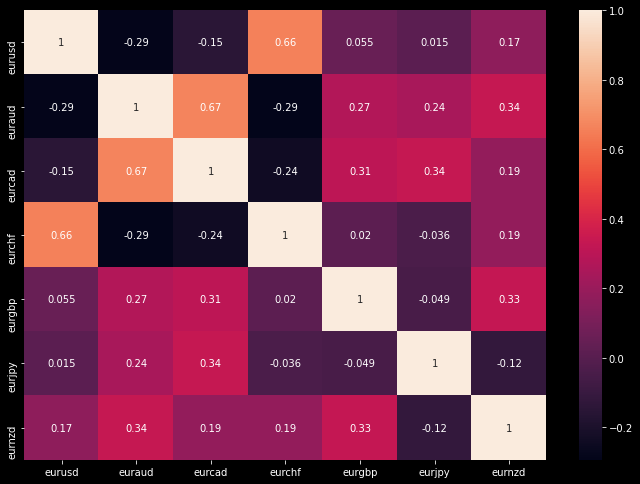

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=allclose.corr(method='kendall'),annot=True,ax=ax)

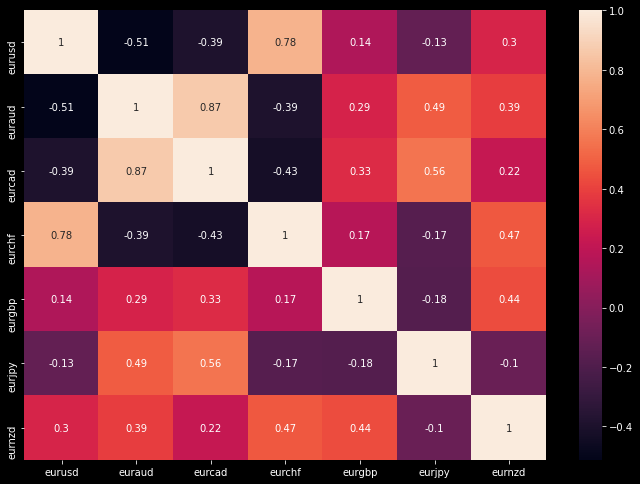

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=allclose.corr(method='pearson'),annot=True,ax=ax)

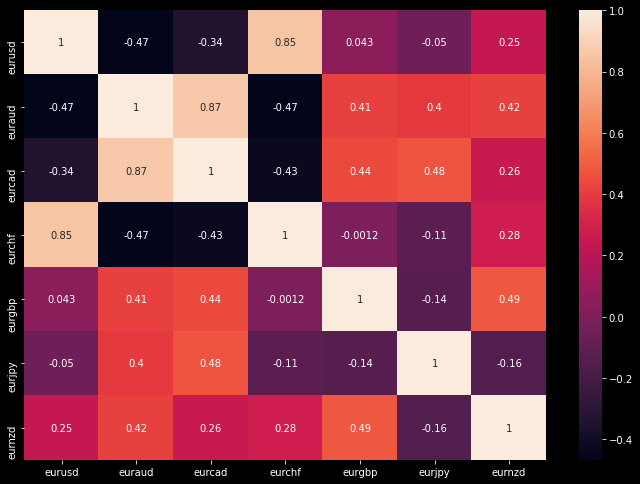

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=allclose.corr(method='spearman'),annot=True,ax=ax)

In [ ]:
x=(allclose['eurusd']-allclose['eurusd'].mean())*(allclose['eurchf']-allclose['eurchf'].mean())
y=0
r=x/(allclose['eurusd'].std()*allclose['eurchf'].std()*len(allclose['eurusd']))
r.sum()

0.7813803423696519

In [ ]:
allclose['eurusd'].std()

0.11222001486918244

In [ ]:
allclose['eurchf'].var()*len(allclose['eurchf'])

617.3379106372039

Parameters

    method{‘pearson’, ‘kendall’, ‘spearman’} or callable

        Method of correlation:

            pearson : standard correlation coefficient

            kendall : Kendall Tau correlation coefficient

            spearman : Spearman rank correlation

            callable: callable with input two 1d ndarrays



In [ ]:
allclose

,eurusd,euraud,eurcad,eurchf,eurgbp,eurjpy,eurnzd
0,1.43153,1.59509,1.49880,1.48334,0.88680,132.757,1.97720
1,1.42886,1.59346,1.49949,1.48250,0.88618,132.730,1.97922
2,1.42705,1.59382,1.49738,1.48294,0.88675,132.680,1.98094
3,1.42939,1.59439,1.49367,1.48239,0.88706,132.743,1.98214
4,1.42848,1.59304,1.49487,1.48181,0.88758,132.490,1.98134
...,...,...,...,...,...,...,...
67690,1.20706,1.62684,1.55911,1.08332,0.89796,125.904,1.70743
67691,1.20665,1.62931,1.55899,1.08290,0.89906,125.929,1.70504
67692,1.20683,1.62934,1.55848,1.08271,0.89928,125.893,1.70596
67693,1.20733,1.62814,1.56171,1.08270,0.89900,125.902,1.70982


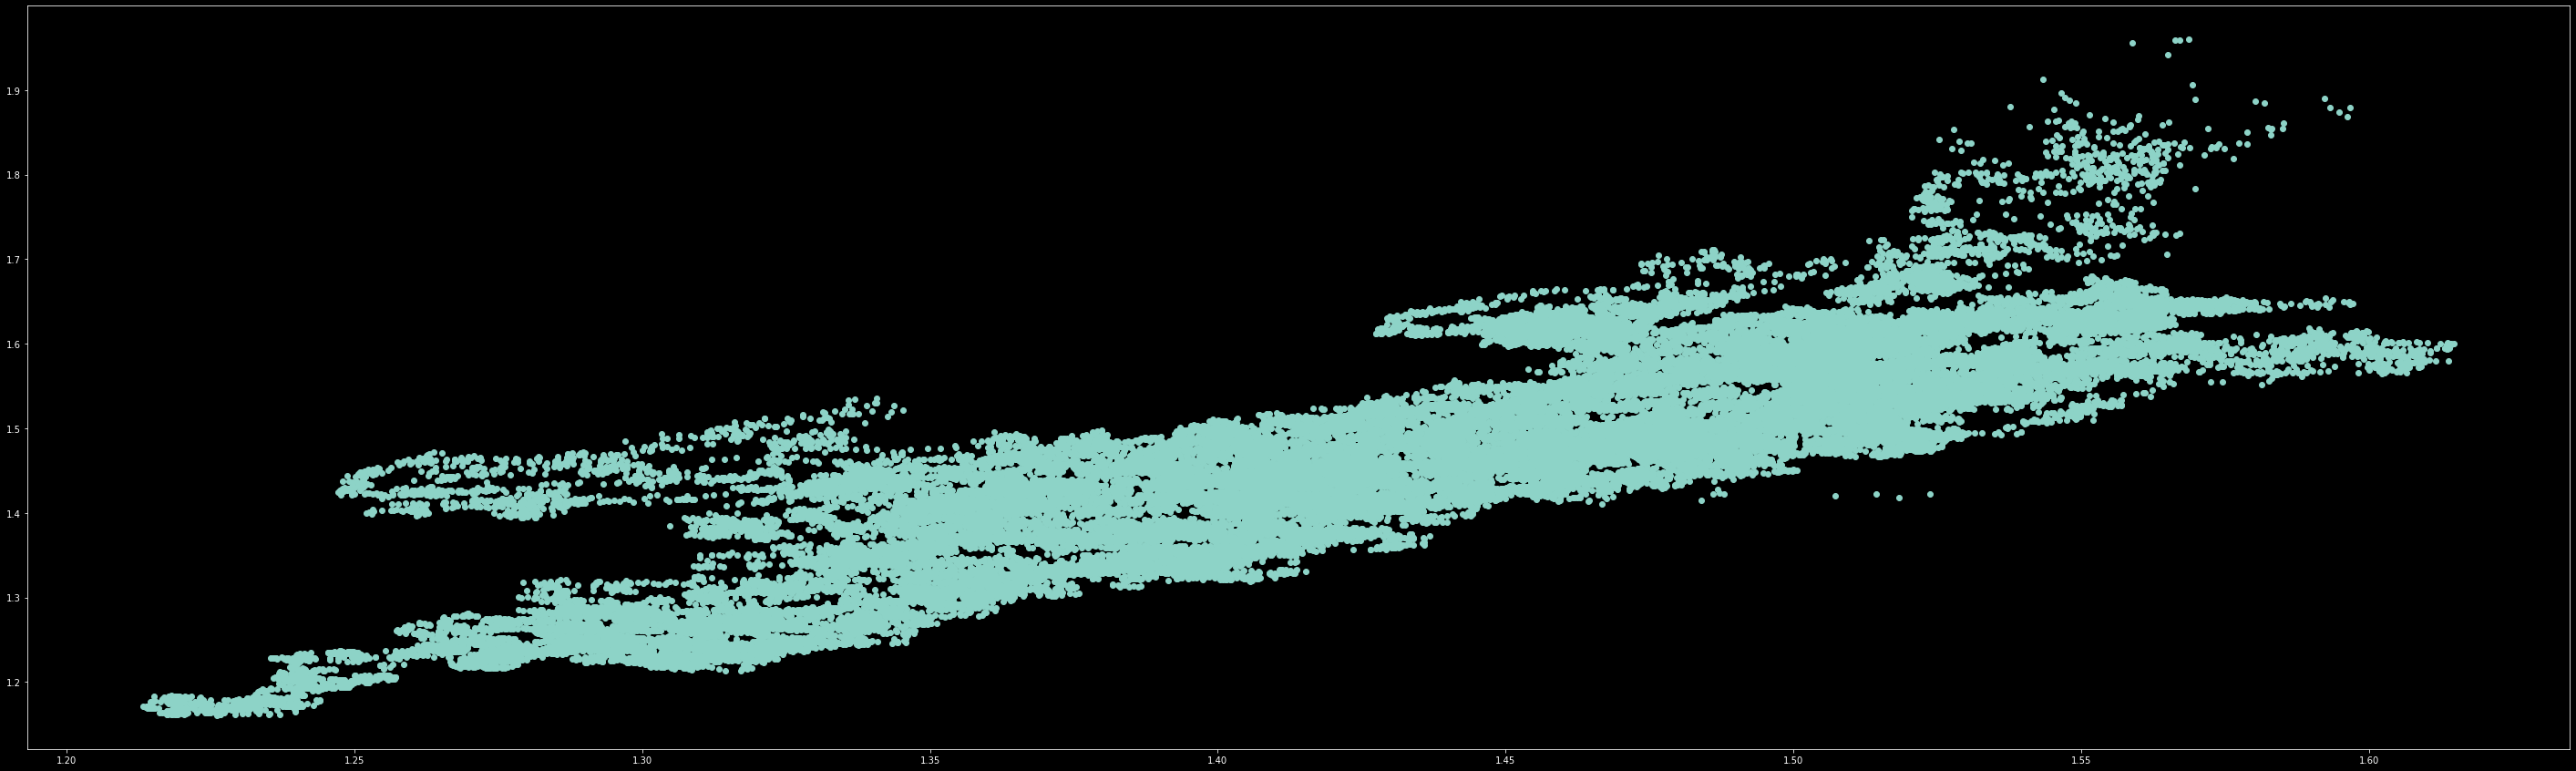

In [ ]:
plt.scatter(allclose['eurcad'],allclose['euraud'])

Text(0.5, 0, 'eurcad')

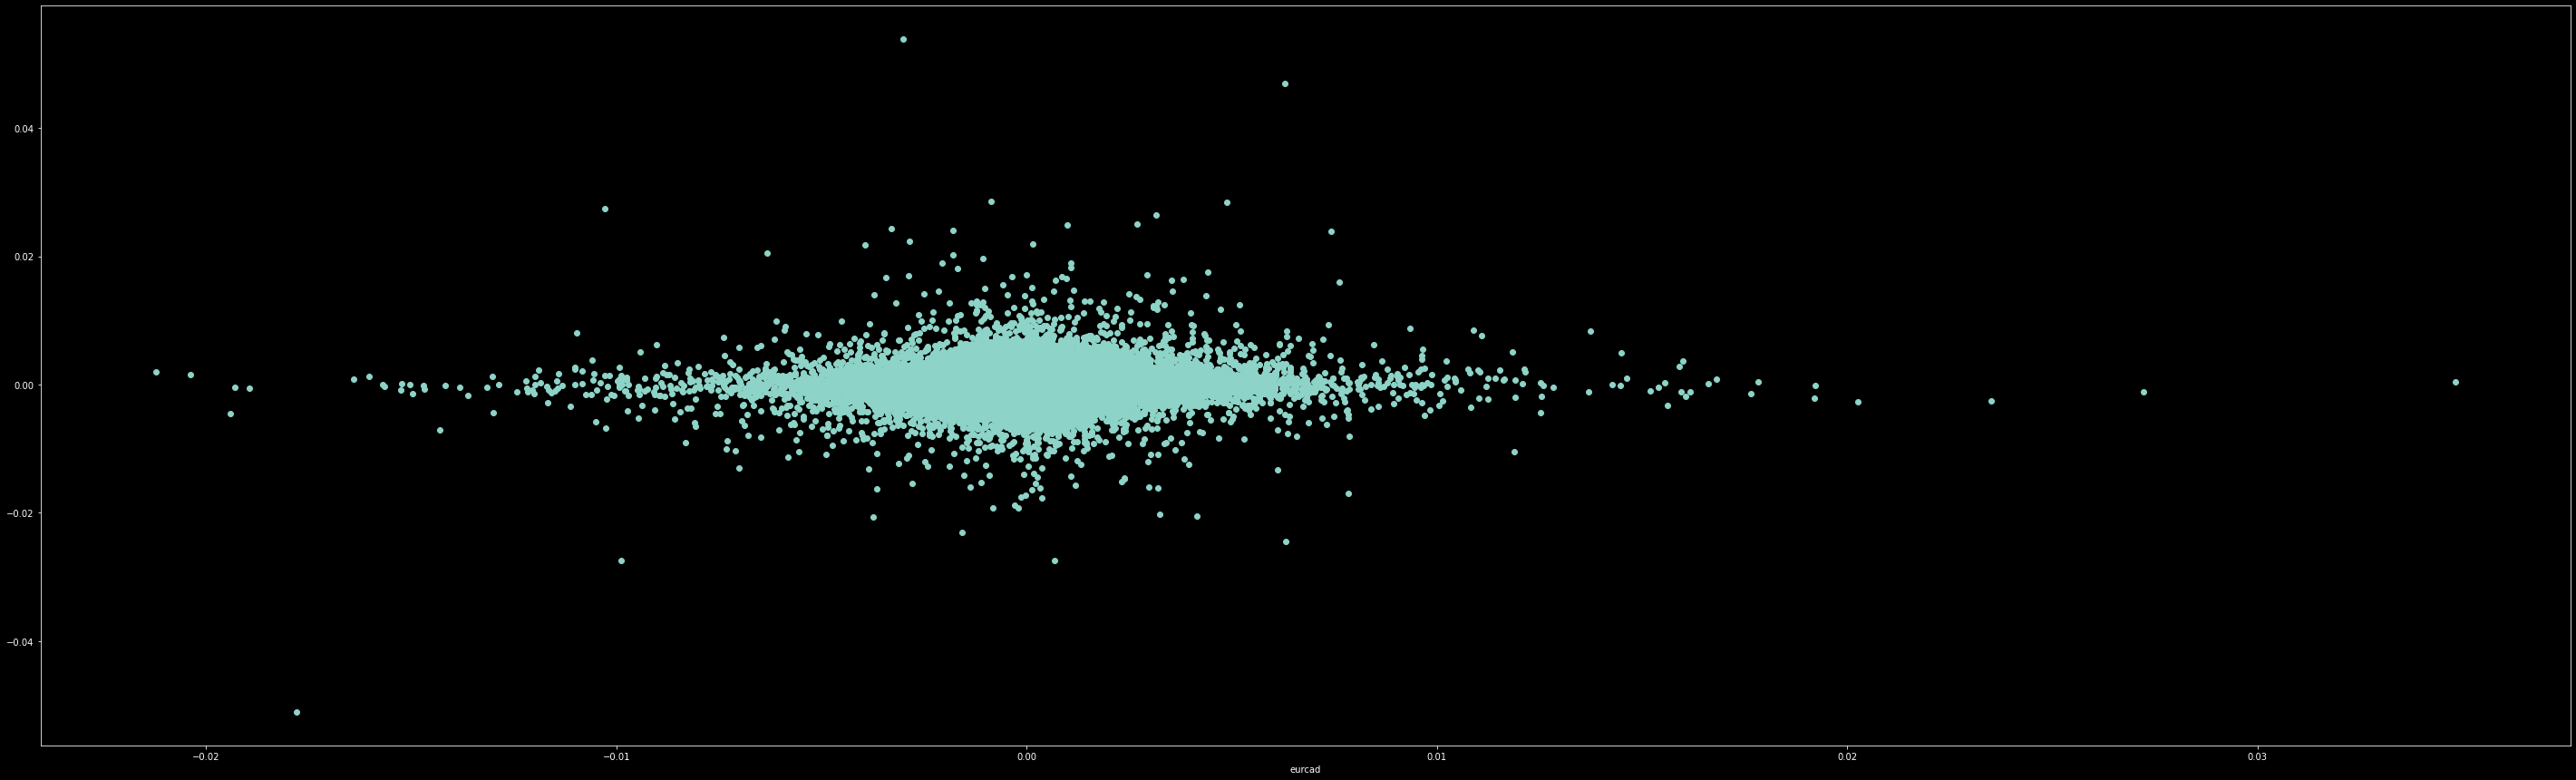

In [ ]:
plt.scatter(allclose['eurcad'].diff(),allclose['euraud'].diff())
plt.xlabel('eurcad')

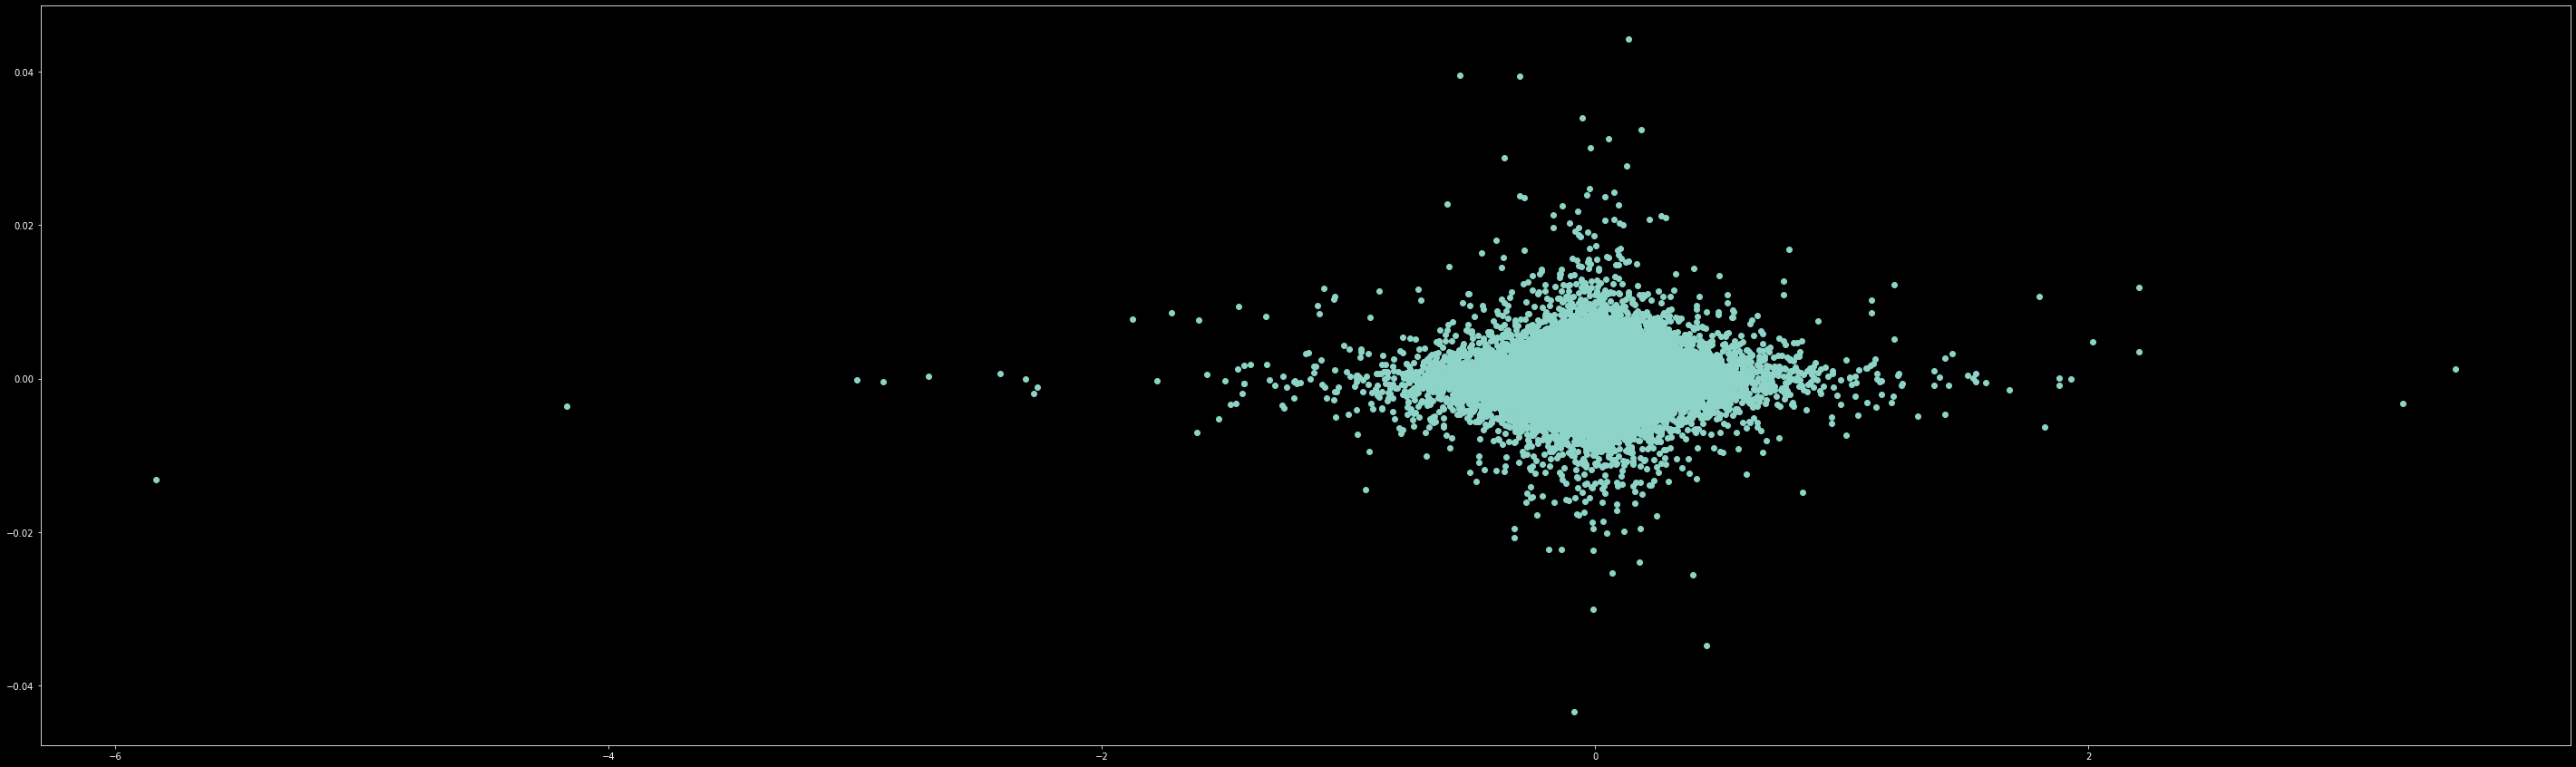

In [ ]:
plt.scatter(allclose['eurjpy'].diff(),allclose['eurnzd'].diff())

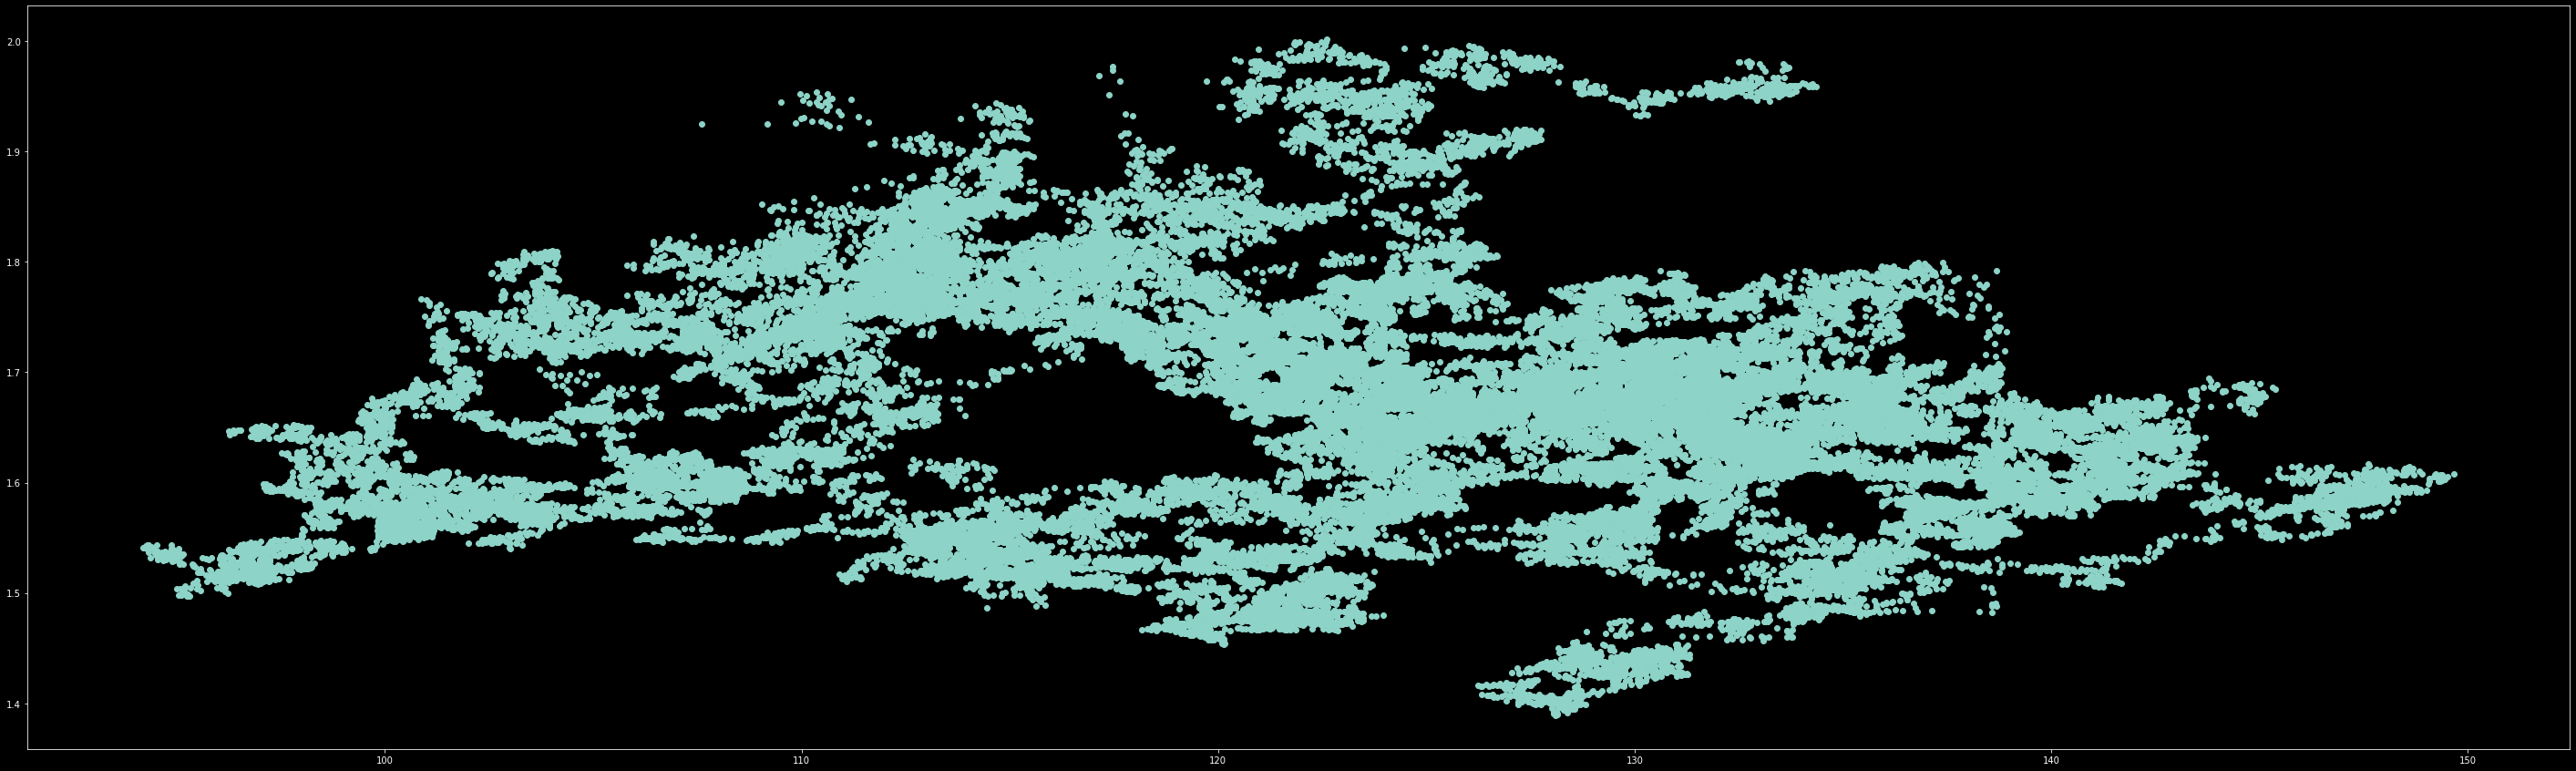

In [ ]:
plt.scatter(allclose['eurjpy'],allclose['eurnzd'])